In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
from Opens2015.etl import load_data as load_2015
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from scipy import stats

In [3]:
df = load_2015('opens2015.db')

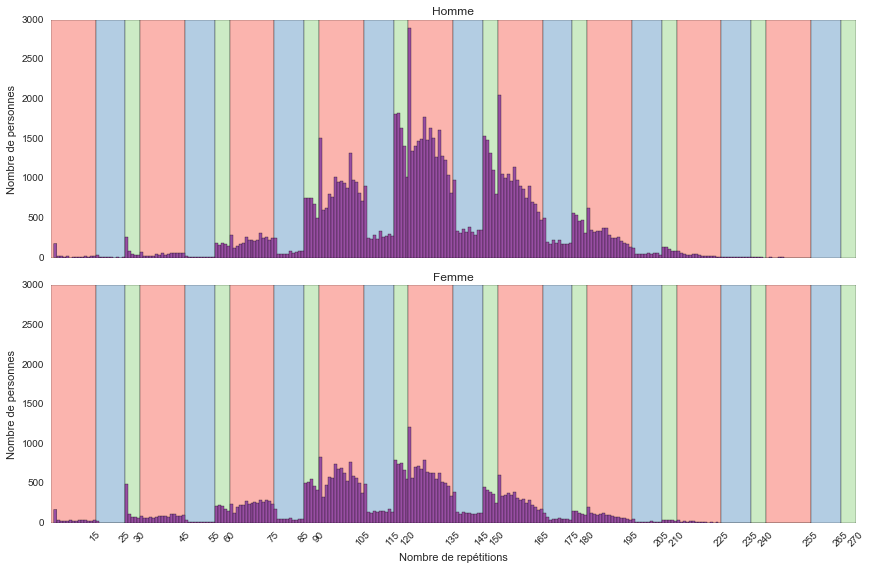

In [8]:
data = df[(df['15.1 Rx']==1) & (df['division'].isin([1,2]))]
high = int(data['15.1'].max())
low = int(data['15.1'].min())
def vline(**kwargs):
    ca = plt.gca()
    ticks = []
    for i in range(0,int(high/30) + 1):
        ttb, dl, snatch = np.array([15, 25, 30]) + 30*i
        ticks.append(ttb)
        ticks.append(dl)
        ticks.append(snatch)
        plt.bar(ttb-15, 3000, width=15, color='#fbb4ae')
        plt.bar(dl-10, 3000, width=10, color='#b3cde3')
        plt.bar(snatch-5, 3000, width=5, color='#ccebc5')
    plt.xticks(ticks, rotation=45)
    

g = sns.FacetGrid(data, row='division', aspect=3, size=4)
g.map(vline)
g.map(plt.hist, '15.1', bins=range(low, high + 1, 1), color="#984ea3")
titles = ["Homme", "Femme"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
g.set_xlabels("Nombre de repétitions")
g.set_ylabels("Nombre de personnes")
g.savefig("Alexis Tremblay - Vis Mtl - Crossfit Opens 15.1.png", format="png", dpi=400, bbox_inches='tight')

In [52]:
percentile_15_1 = np.percentile(data[data['division']==1]['15.1'].values, range(0,100))
percentile_norm = np.percentile(np.random.normal(size=10000), range(0,100))
perc = DataFrame({"15.1":percentile_15_1, "Normale":percentile_norm})

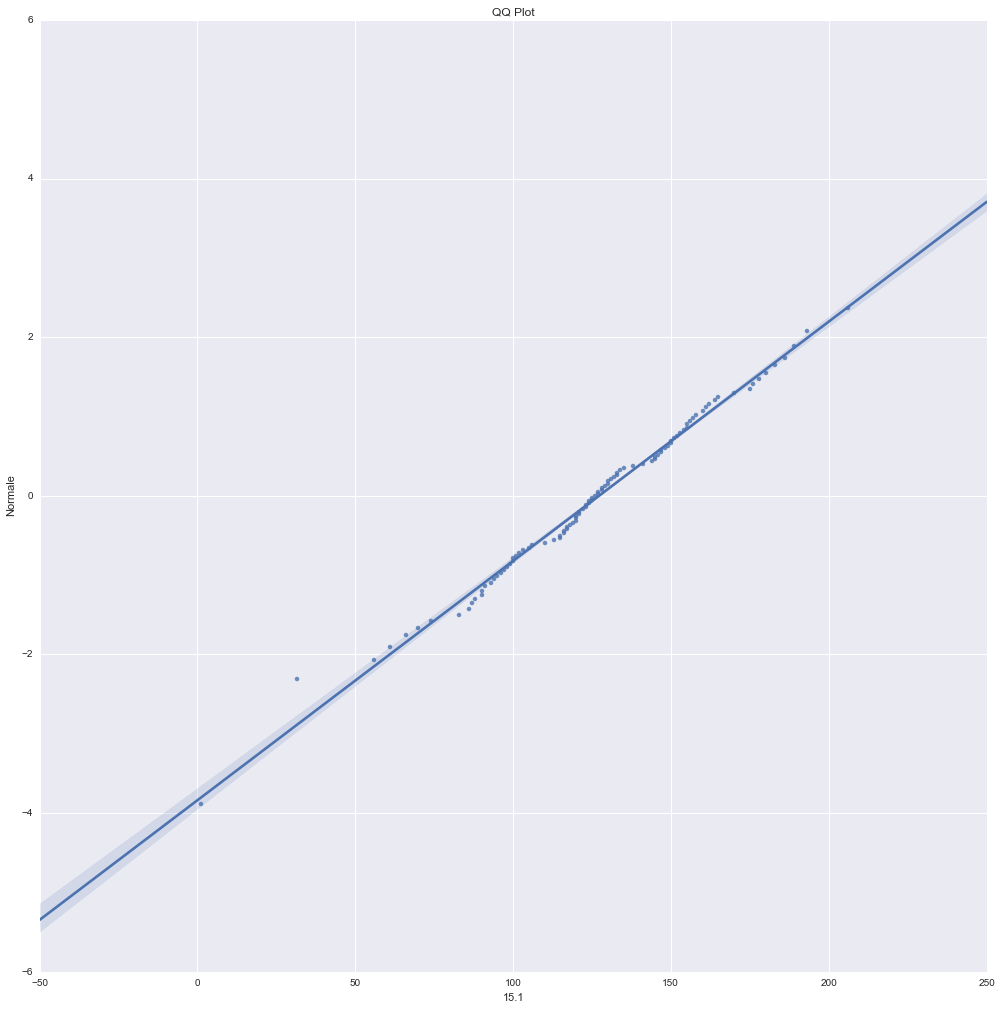

In [58]:
p = sns.lmplot("15.1","Normale", perc, size=14)
p.axes.flat[0].set_title("QQ Plot")

In [54]:
stats.linregress(percentile_norm, percentile_15_1)

(32.879338472952988,
 127.17432839005478,
 0.99592489458879352,
 3.2420971287454617e-104,
 0.300763386322628)

In [57]:
data[data['division']==1]['15.1'].describe()

count    91950.000000
mean       127.138619
std         33.799597
min          1.000000
25%        103.000000
50%        126.000000
75%        150.000000
max        245.000000
Name: 15.1, dtype: float64